# Module 1, Notebook 2, Outline

## Steps 4 and 5 – Examine and Data Carpentry
### Challenges with Representing Structure

- Intractable to represent full atomic structure out to 4000 atoms with rotational/translations.
- Instead, we will use chemical descriptors and molecular fingerprints.
  - Collapse molecular structure to a set of features that is translation/rotationally invariant.

### Introduction to SMILES and SMARTS

### Chemical Descriptors

- Molecular Weight
- Crippen Contributions
- Gasteiger Partial Charge

### Chemical Fingerprints

- Atom Pair Fingerprints

### Feature Reduction Methods and Clustering

- Principal Component Analysis (PCA)
- t-SNE
- UMAP
- Autoencoding

## **Goal: make chemical features available for machine learning**
### This notebook calculates structure features relevant to all of the chemical structures and adds these to the dataframe

In [2]:
#READS DATABASE FROM FILE CREATED FROM PREVIOUS NOTEBOOK
import pandas as pd

path = './'+'CompoundData.parquet'
CompoundData=pd.read_parquet(path)

In [3]:
display(CompoundData)

,CAS,MW,BP,SMILES,mol3D
0,999-90-6,132.2240,405.00,CC(=O)SC(C)(C)C,\r\n NIST 06261404023D 1 1.00000 -709.2...
1,99-98-9,136.1943,536.20,CN(C)C1=CC=C(C=C1)N,\r\n NIST 07201406313D 1 1.00000 -421.5...
2,999-78-0,96.1702,356.00,CC#CC(C)(C)C,\r\n NIST 07011509563D 1 1.00000 -273.9...
3,99-97-8,135.2062,484.20,CC1=CC=C(C=C1)N(C)C,"Benzenamine, N,N,4-trimethyl-\r\n NIST 062..."
4,99-94-5,136.1479,547.70,CC1=CC=C(C=C1)C(=O)O,"Benzoic acid, 4-methyl-\r\n NIST 070113222..."
...,...,...,...,...,...
3536,100-07-2,170.5930,417.00,COC1=CC=C(C=C1)C(=O)Cl,\r\n NIST 06241419033D 1 1.00000 -919.7...
3537,1000-63-1,130.2279,397.15,CCCCOC(C)(C)C,\r\n NIST 07011503513D 1 1.00000 -390.9...
3538,100-06-1,150.1745,531.20,CC(=O)C1=CC=C(C=C1)OC,\r\n NIST 07011513463D 1 1.00000 -499.4...
3539,100-02-7,139.1088,552.20,C1=CC(=CC=C1[N+](=O)[O-])O,\r\n NIST 06181406493D 1 1.00000 -511.9...


# SMILES Notation

**SMILES** (Simplified Molecular Input Line Entry System) is a line notation system for describing chemical structures using ASCII strings. It was originally developed by Daylight Chemical Information Systems in the late 1980s and has since become a widely accepted standard in cheminformatics for representing molecular structures.

### Purpose of SMILES
SMILES strings provide a way to encode molecular structures using a linear notation. Each molecule is represented as a series of atomic symbols, bonds, and other chemical information. This notation simplifies the process of storing and sharing chemical information in databases and facilitates computational chemistry tasks.

### Syntax of SMILES
In SMILES, atoms are represented by their atomic symbols. Bonds between atoms are implied by adjacency, but can also be explicitly represented using certain symbols:
- **Single bond**: `-` (can be omitted)
- **Double bond**: `=`
- **Triple bond**: `#`
- **Aromatic bonds**: `:`

### Key Features
- **Atoms**: Atoms are represented by their symbols, such as `C` for carbon and `O` for oxygen. Some atoms can also be represented in an aromatic form using lowercase letters (e.g., `c` for aromatic carbon).
- **Rings**: SMILES allows ring structures to be represented using numbers to indicate ring closures. For example, `C1CCCCC1` represents cyclohexane.
- **Branches**: Parentheses are used to denote branching structures. For example, `CC(C)C` represents isobutane.
- **Chirality**: SMILES notation supports the specification of stereochemistry using the symbols `@` and `@@` for chiral centers.
- **Aromaticity**: Aromatic rings are represented using lowercase atomic symbols, such as `c1ccccc1` for benzene.

### Example
The SMILES string for **aspirin** (acetylsalicylic acid) is:

`CC(=O)Oc1ccccc1C(=O)O`

This string describes a molecule consisting of a benzene ring (c1ccccc1), with acetyl and carboxyl groups attached to it.
For more details, you can visit the [OpenSMILES website - http://opensmiles.org/opensmiles.html](http://opensmiles.org/opensmiles.html)).



## CIRpy - Convert between SMILES and other notations

**CIRpy** is a Python interface for the Chemical Identifier Resolver (CIR), developed by the CADD Group at the NCI/NIH. CIR is a web service that converts any chemical identifier into another chemical representation. For example, it can take a chemical name and return the corresponding SMILES string.

Examples of flags for outputs:
[stdinchi, stdinchikey, inchi, smiles, ficts, ficus, uuuuu, hashisy, sdf, names, iupac_name, cas, formula]

In [1]:
comment this line and run to install cirpy
%pip install cirpy

SyntaxError: invalid syntax (2516363835.py, line 1)

In [4]:
import cirpy
cirpy.resolve('C1=CC=CC(=C1C(O)=O)OC(C)=O', 'iupac_name')

'2-acetyloxybenzoic acid'

In [5]:
cirpy.resolve('C1=CC=CC(=C1C(O)=O)OC(C)=O', 'names')[11]

'Aspirin (JP15/USP)'

In [6]:
cirpy.resolve(CompoundData['CAS'][0],'smiles')

'CC(=O)SC(C)(C)C'

# Visualize structures with RDKit

In [2]:
comment this line and run to install rdkit
%pip install rdkit

SyntaxError: invalid syntax (3192145735.py, line 1)

369
CC1CCC(CC1)O


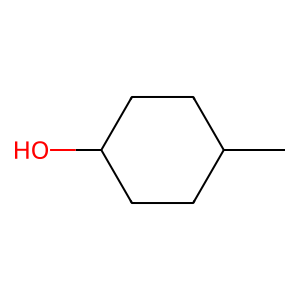

In [11]:
#DISPLAYS RANDOM COMPOUND FROM DATAFRAME. JUST FOR FUN
from rdkit import Chem
from rdkit.Chem import Draw

from IPython.display import display
import random

i = random.randrange(0,len(CompoundData))
print(i)
print(CompoundData.iloc[i,3])

mol = Chem.MolFromSmiles(CompoundData.iloc[i,3])
img = Draw.MolToImage(mol)
display(img)

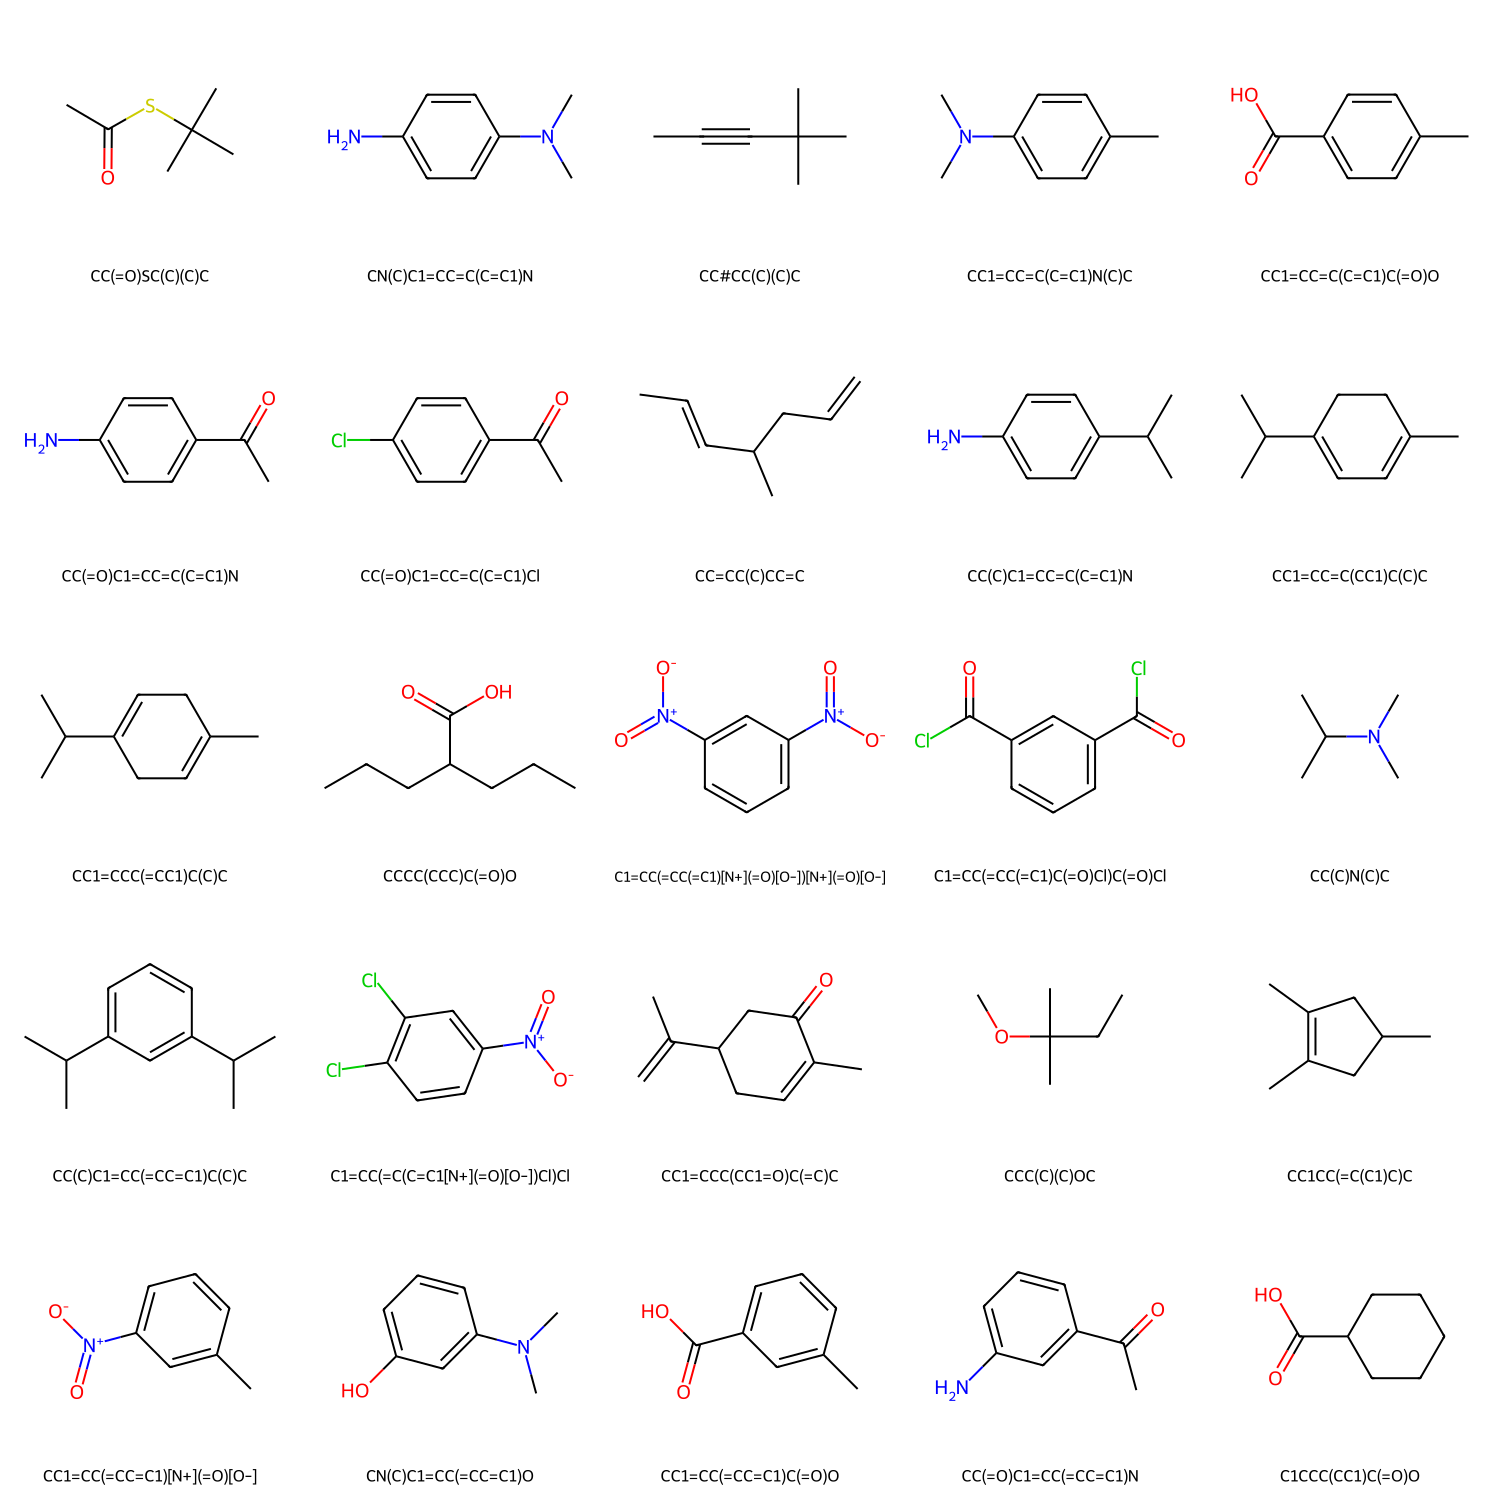

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
import pandas as pd

# Assuming CompoundData contains SMILES strings in 'SMILES' column
# For this script, we'll create a list of SMILES strings (the first 25 compounds)
smiles_list = CompoundData['SMILES'].head(30).tolist()

# List to hold the 2D RDKit molecules
mols = []
legs = []

# Generate 2D structures for each molecule and add to mols list
i = 0
for smiles in smiles_list:
    if i < 25:
        if smiles is not None:
            mol = Chem.MolFromSmiles(smiles)  # Create RDKit molecule from SMILES
            if mol is not None:
                Chem.rdDepictor.Compute2DCoords(mol)  # Generate 2D coordinates
                mols.append(mol)
                legs.append(smiles)
                i += 1

# Create a grid image of the molecules (5x5 grid)
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300, 300), legends=legs)

# Display the image
display(img)

# Optionally, save the image
# img.save("molecule_grid.png")


# Functional Groups Affect Boiling Point 
The presence of heteroatoms lead to different intermolecular interactions between molecules in the liquid or solid phase that will change how much energy is required to make the molecules boil, thereby changing the boiling point temperature.

Over hundreds of years, humans have realized that is useful to classify groups of atoms together to be termed "functional groups", because when these atoms appear together, they behave similarly. 

Rather than reinventing the wheel here, let's just categorize what functional groups are present in each molecule, and use that information to help us predict boiling points.

# SMARTS Notation

SMARTS (SMiles ARbitrary Target Specification) is a flexible language used to describe molecular patterns for substructure searching. It builds on SMILES notation by adding enhanced pattern-matching capabilities.

## 1. Basic Elements

- **Atoms:** `[C]` for carbon, `[N]` for nitrogen. `*` is a wildcard for any atom.
- **Bonds:**
  - Single: `-`
  - Double: `=`
  - Triple: `#`
  - Aromatic: `:`
  
Example: `C-C` represents two carbons connected by a single bond.

## 2. Logical Operators

SMARTS uses logical operators:
- **AND:** `&`
- **OR:** `,`
- **NOT:** `!`

Example: `[O,N]` matches oxygen or nitrogen.

## 3. Recursive SMARTS

Nested patterns are enclosed in `$()`. For example, `$([CX3]=[OX1])` matches a carbonyl group.

## 4. Atom and Bond Properties

Atoms and bonds can have specific properties:
- `[CX4]`: Tetrahedral (sp3) carbon.
- `[NX3+0]`: Neutral nitrogen with three bonds.
- `[O-]`: Negatively charged oxygen.

## 5. Functional Group Examples

- **Alkyl Carbon:** `[CX4]`
- **Carbonyl Group:** `[CX3]=[OX1]`
- **Aromatic Rings:** `c1ccccc1` for benzene.

## 6. Chirality & Stereochemistry

- `[C@]`: Clockwise chirality.
- `[C@@]`: Counterclockwise chirality.

Example: `C[C@](F)(Cl)Br` defines a chiral carbon.

## 7. Electron & Proton Features

- **Carboxylic Acid:** `[CX3](=O)[OX2H]`
- **Radicals:** `[C;X3v3+0]` matches a carbon free radical.

This condensed guide provides key elements of SMARTS notation, enabling efficient pattern-based searching in chemical databases.
For more information, please refer to https://daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html


In [14]:
#SMARTS patterns: https://daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html
AllenicPatt = Chem.MolFromSmarts('[$([CX2](=C)=C)]')
VinylicPatt = Chem.MolFromSmarts('[$([CX3]=[CX3])]')
ArenePatt = Chem.MolFromSmarts('c')
AlcoholPatt = Chem.MolFromSmarts('[#6][OX2H]')
EtherPatt = Chem.MolFromSmarts('[OD2]([#6])[#6]')
AminePatt = Chem.MolFromSmarts('[NX3;H2,H1;!$(NC=O)]')
IminePatt = Chem.MolFromSmarts('[$([CX3]([#6])[#6]),$([CX3H][#6])]=[$([NX2][#6]),$([NX2H])]')
NitrilePatt = Chem.MolFromSmarts('[NX1]#[CX2]')
ThiolPatt = Chem.MolFromSmarts('[#16X2H]')
SulfidePatt = Chem.MolFromSmarts('[SX2;!#16X2H]')
DisulfidePatt = Chem.MolFromSmarts('[#16X2H0;!#16X2H]')
AldehydePatt = Chem.MolFromSmarts('[CX3H1](=O)[#6]')
KetonePatt = Chem.MolFromSmarts('[#6][CX3](=O)[#6]')
CarboxylAcidPatt = Chem.MolFromSmarts('[OX2H][CX3]=[OX1]')
EsterPatt = Chem.MolFromSmarts('[#6][CX3](=O)[OX2H0][#6]')
ThioesterPatt = Chem.MolFromSmarts('S([#6])[CX3](=O)[#6]')
AmidePatt = Chem.MolFromSmarts('[NX3][CX3](=[OX1])[#6]')
AcidChloridePatt = Chem.MolFromSmarts('[CX3](=[OX1])[F,Cl,Br,I]')
AnhydridePatt = Chem.MolFromSmarts('[CX3](=[OX1])[OX2][CX3](=[OX1])')

In [15]:
compounds = CompoundData["SMILES"]
display(compounds)

0                   CC(=O)SC(C)(C)C
1               CN(C)C1=CC=C(C=C1)N
2                      CC#CC(C)(C)C
3               CC1=CC=C(C=C1)N(C)C
4              CC1=CC=C(C=C1)C(=O)O
                   ...             
3536         COC1=CC=C(C=C1)C(=O)Cl
3537                  CCCCOC(C)(C)C
3538          CC(=O)C1=CC=C(C=C1)OC
3539     C1=CC(=CC=C1[N+](=O)[O-])O
3540    C1=CC(=CC=C1[N+](=O)[O-])Cl
Name: SMILES, Length: 3541, dtype: object

In [3]:
from tqdm import tqdm
from rdkit import Chem

# WILL WORK THROUGH DATAFRAME AND RECORD FUNCTIONAL GROUPS AND ADD TO DATAFRAME
Comment this line and run to loop through all compounds and label with functional groups
compound = CompoundData["SMILES"]

# Initialize the functional group columns
functional_groups = [
    'Allenic', 'Vinylic', 'Arene', 'Alcohol', 'Ether', 'Amine', 'Imine',
    'Nitrile', 'Thiol', 'Sulfide', 'Disulfide', 'Aldehyde', 'Ketone',
    'CarboxylAcid', 'Ester', 'Thioester', 'Amide', 'AcidChloride', 'Anhydride', 'Errors'
]
for group in functional_groups:
    CompoundData[group] = 0

# Iterate through the SMILES and identify functional groups with a progress bar
for i in tqdm(range(len(compound)), desc="Processing compounds"):
    try:
        mol = Chem.MolFromSmiles(compound[i])
        CompoundData.loc[i, 'Allenic'] = 1 if mol.HasSubstructMatch(AllenicPatt) else 0
        CompoundData.loc[i, 'Vinylic'] = 1 if mol.HasSubstructMatch(VinylicPatt) else 0
        CompoundData.loc[i, 'Arene'] = 1 if mol.HasSubstructMatch(ArenePatt) else 0
        CompoundData.loc[i, 'Alcohol'] = 1 if mol.HasSubstructMatch(AlcoholPatt) else 0
        CompoundData.loc[i, 'Ether'] = 1 if mol.HasSubstructMatch(EtherPatt) else 0
        CompoundData.loc[i, 'Amine'] = 1 if mol.HasSubstructMatch(AminePatt) else 0
        CompoundData.loc[i, 'Imine'] = 1 if mol.HasSubstructMatch(IminePatt) else 0
        CompoundData.loc[i, 'Nitrile'] = 1 if mol.HasSubstructMatch(NitrilePatt) else 0
        CompoundData.loc[i, 'Thiol'] = 1 if mol.HasSubstructMatch(ThiolPatt) else 0
        CompoundData.loc[i, 'Sulfide'] = 1 if mol.HasSubstructMatch(SulfidePatt) else 0
        CompoundData.loc[i, 'Disulfide'] = 1 if mol.HasSubstructMatch(DisulfidePatt) else 0
        CompoundData.loc[i, 'Aldehyde'] = 1 if mol.HasSubstructMatch(AldehydePatt) else 0
        CompoundData.loc[i, 'Ketone'] = 1 if mol.HasSubstructMatch(KetonePatt) else 0
        CompoundData.loc[i, 'CarboxylAcid'] = 1 if mol.HasSubstructMatch(CarboxylAcidPatt) else 0
        CompoundData.loc[i, 'Ester'] = 1 if mol.HasSubstructMatch(EsterPatt) else 0
        CompoundData.loc[i, 'Thioester'] = 1 if mol.HasSubstructMatch(ThioesterPatt) else 0
        CompoundData.loc[i, 'Amide'] = 1 if mol.HasSubstructMatch(AmidePatt) else 0
        CompoundData.loc[i, 'AcidChloride'] = 1 if mol.HasSubstructMatch(AcidChloridePatt) else 0
        CompoundData.loc[i, 'Anhydride'] = 1 if mol.HasSubstructMatch(AnhydridePatt) else 0
    except Exception as e:
        CompoundData.loc[i, 'Errors'] = 1

# Display the final dataframe
display(CompoundData)


SyntaxError: invalid syntax (2666667545.py, line 5)

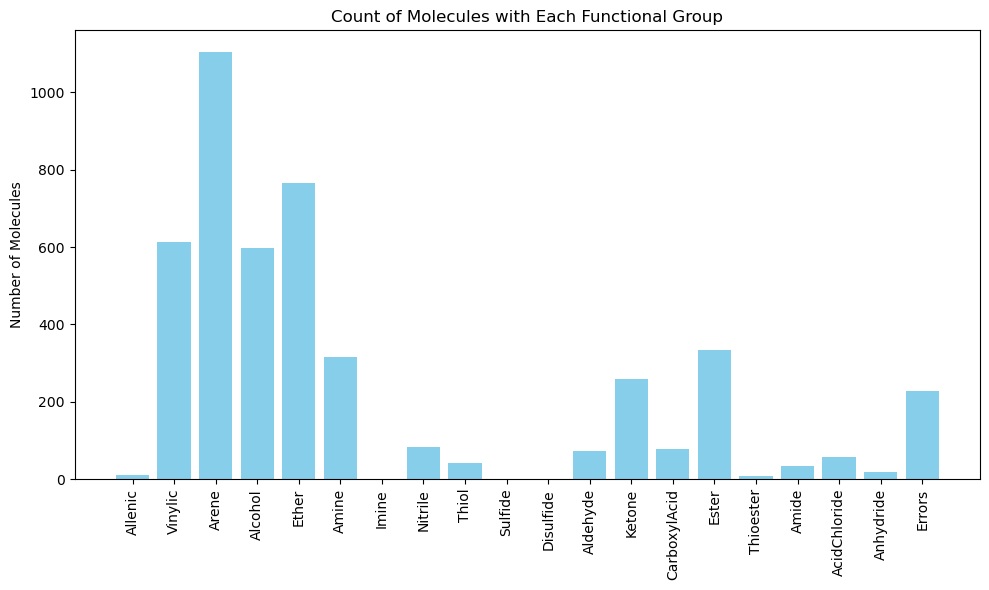

In [17]:
import matplotlib.pyplot as plt

# List of functional groups
functional_groups = ['Allenic', 'Vinylic', 'Arene', 'Alcohol', 'Ether', 'Amine', 'Imine', 
                     'Nitrile', 'Thiol', 'Sulfide', 'Disulfide', 'Aldehyde', 'Ketone', 
                     'CarboxylAcid', 'Ester', 'Thioester', 'Amide', 'AcidChloride', 'Anhydride','Errors']

# Calculate the sum of each functional group column
group_counts = CompoundData[functional_groups].sum()

# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(group_counts.index, group_counts.values, color='skyblue')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.ylabel('Number of Molecules')
plt.title('Count of Molecules with Each Functional Group')
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
# Drop rows where 'Errors' is 1
CompoundData = CompoundData[CompoundData['Errors'] != 1]

# Reset the row numbering (index) and drop the old index
CompoundData = CompoundData.reset_index(drop=True)

# Display the updated dataframe
display(CompoundData)

,CAS,MW,BP,SMILES,mol3D,Allenic,Vinylic,Arene,Alcohol,Ether,...,Disulfide,Aldehyde,Ketone,CarboxylAcid,Ester,Thioester,Amide,AcidChloride,Anhydride,Errors
0,999-90-6,132.2240,405.00,CC(=O)SC(C)(C)C,\r\n NIST 06261404023D 1 1.00000 -709.2...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,99-98-9,136.1943,536.20,CN(C)C1=CC=C(C=C1)N,\r\n NIST 07201406313D 1 1.00000 -421.5...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,999-78-0,96.1702,356.00,CC#CC(C)(C)C,\r\n NIST 07011509563D 1 1.00000 -273.9...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,99-97-8,135.2062,484.20,CC1=CC=C(C=C1)N(C)C,"Benzenamine, N,N,4-trimethyl-\r\n NIST 062...",0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,99-94-5,136.1479,547.70,CC1=CC=C(C=C1)C(=O)O,"Benzoic acid, 4-methyl-\r\n NIST 070113222...",0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,100-07-2,170.5930,417.00,COC1=CC=C(C=C1)C(=O)Cl,\r\n NIST 06241419033D 1 1.00000 -919.7...,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3308,1000-63-1,130.2279,397.15,CCCCOC(C)(C)C,\r\n NIST 07011503513D 1 1.00000 -390.9...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3309,100-06-1,150.1745,531.20,CC(=O)C1=CC=C(C=C1)OC,\r\n NIST 07011513463D 1 1.00000 -499.4...,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3310,100-02-7,139.1088,552.20,C1=CC(=CC=C1[N+](=O)[O-])O,\r\n NIST 06181406493D 1 1.00000 -511.9...,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# `rdkit.Chem.rdMolDescriptors` Module Overview

The `rdkit.Chem.rdMolDescriptors` module in RDKit provides a collection of functions for computing molecular descriptors, which are numerical values representing specific chemical properties of molecules. This module plays a key role in cheminformatics, enabling users to calculate a wide variety of descriptors used for molecule analysis, prediction of chemical behavior, and machine learning tasks. Below is a summary of the primary functions and features available in this module:

## Key Classes and Functions

- **AtomPairsParameters**: Defines parameters for computing atom-pair fingerprints, including properties like `atomTypes`, `codeSize`, and the number of bits for different molecular properties such as chirality and path bits.

- **BCUT2D**: Computes 2D BCUT descriptors, which represent eigenvalues of molecular properties such as atomic mass, charge, and logP. The function can return high and low eigenvalues based on atomic properties.

- **CalcAUTOCORR2D / CalcAUTOCORR3D**: Computes 2D and 3D autocorrelation descriptors based on the spatial distribution of atoms in the molecule.

- **CalcExactMolWt**: Returns the exact molecular weight of a molecule, optionally including only heavy atoms.

- **CalcFractionCSP3**: Returns the fraction of carbon atoms in a molecule that are sp3 hybridized.

- **Crippen Descriptors (CalcCrippenDescriptors)**: Computes the Wildman-Crippen logP and molecular refractivity values for a molecule.

- **Topological Descriptors (Chi)**: Functions like `CalcChi0n`, `CalcChi1v`, etc., compute topological indices for the molecule based on connectivity and other properties.

- **Coulomb Matrix (CalcCoulombMat)**: Computes Coulomb matrices, which are used to represent molecules based on atomic charges and distances.

- **Shape and Surface Descriptors**: Functions like `CalcAsphericity`, `CalcRadiusOfGyration`, and `CalcSpherocityIndex` describe the shape and surface of the molecule.

- **Ring Descriptors**: Functions such as `CalcNumRings`, `CalcNumAromaticRings`, and `CalcNumSaturatedRings` return counts for different types of ring structures in the molecule.

- **Lipinski Rule of Five Descriptors**: Descriptors like `CalcNumLipinskiHBA` and `CalcNumLipinskiHBD` are used for drug-likeness screening based on hydrogen bond acceptors and donors.

- **Rotatable Bonds**: `CalcNumRotatableBonds` computes the number of rotatable bonds in a molecule, with strict and non-strict options.

- **Molecular Fingerprints**: Functions like `GetAtomPairFingerprint`, `GetMorganFingerprint`, and `GetTopologicalTorsionFingerprint` generate various types of molecular fingerprints, used for comparing molecules.

- **WHIM, RDF, and GETAWAY Descriptors**: These describe 3D molecular shapes and distributions, such as the WHIM descriptors for molecular geometry and RDF descriptors for radial distribution functions.

- **Oxidation Numbers (CalcOxidationNumbers)**: Calculates oxidation states for the atoms in a molecule, using electronegativity-based rules.

- **Double Cubic Lattice Volume**: A class used for calculating properties like Van der Waals volume, surface area, and compactness for molecules and proteins.

- **USR and USRCAT Descriptors**: Functions like `GetUSR` and `GetUSRCAT` compute descriptors based on 3D molecular shape, often used for similarity searches.

- **Properties Class**: Manages property computation and allows annotation of molecules with computed properties, providing access to standard molecular properties like exact molecular weight or Lipinski's H-bond descriptors.

https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html

# `rdkit.Chem.Descriptors3D` Module Overview

The `rdkit.Chem.Descriptors3D` module provides 3D molecular descriptors, capturing spatial and geometric properties essential in molecular modeling and cheminformatics.

## Key Descriptors

- **Asphericity**: Measures how much a molecule deviates from a spherical shape.  
  *Reference*: Todeschini and Consoni, "Descriptors from Molecular Geometry", Handbook of Chemoinformatics [DOI](https://doi.org/10.1002/9783527618279.ch37)

- **Eccentricity**: Quantifies the deviation of molecular shape from being spherical.  
  *Reference*: Todeschini and Consoni, "Descriptors from Molecular Geometry", Handbook of Chemoinformatics [DOI](https://doi.org/10.1002/9783527618279.ch37)

- **Inertial Shape Factor**: Describes the overall shape of a molecule based on its principal moments of inertia.  
  *Reference*: Todeschini and Consoni, "Descriptors from Molecular Geometry", Handbook of Chemoinformatics [DOI](https://doi.org/10.1002/9783527618279.ch37)

- **NPR1 & NPR2**: Normalized principal moments ratios. NPR1 is the ratio of the smallest to largest moment (I1/I3), and NPR2 is the ratio of the second to the largest moment (I2/I3).  
  *Reference*: Sauer and Schwarz, JCIM 43:987-1003 (2003) [DOI](https://doi.org/10.1021/ci025599w)

- **Plane of Best Fit (PBF)**: Measures how well the molecule fits a plane.  
  *Reference*: [DOI](https://doi.org/10.1021/ci300293f)

- **Principal Moments of Inertia (PMI1, PMI2, PMI3)**: The principal moments of inertia, ordered from smallest (PMI1) to largest (PMI3). These values describe how mass is distributed relative to different axes in the molecule.

- **Radius of Gyration**: Describes how the mass of the molecule is distributed around its center of mass. Different formulas are used for planar and nonplanar molecules.  
  *Reference*: Todeschini and Consoni, "Descriptors from Molecular Geometry", Handbook of Chemoinformatics [DOI](https://doi.org/10.1002/9783527618279.ch37)

- **Spherocity Index**: A measure of how close the molecule is to a perfect sphere.  
  *Reference*: Todeschini and Consoni, "Descriptors from Molecular Geometry", Handbook of Chemoinformatics [DOI](https://doi.org/10.1002/9783527618279.ch37)

## Additional Features

- **CalcMolDescriptors3D**: Computes the full set of 3D descriptors for a molecule, returning a dictionary of descriptor names and their corresponding values.

## Use Cases

These descriptors are particularly useful for:
- Analyzing 3D molecular shape and geometry.
- Modeling 3D molecular properties in QSAR/QSPR studies.
- Comparing molecular shapes for





See https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors3D.html
irtual screening and drug discovery.



# Crippen Contributions

Crippen contributions are atomic descriptors that provide insights into the molecular properties of a compound. They consist of:

- **LogP Contribution (CripA):** Quantifies the atomic contributions to the compound's octanol-water partition coefficient (logP), representing hydrophobicity.
- **Molar Refractivity Contribution (CripB):** Quantifies atomic contributions to molar refractivity, linked to molecular polarizability.

### Steps to Extract Crippen Contributions for a Single Compound
1. Import required RDKit modules.
2. Generate a molecular object (`mol`) from the compound's SMILES string.
3. Use `_CalcCrippenContribs(mol)` to compute atomic-level contributions.
4. Sum up contributions:
   - `CripA`: Sum of all logP contributions.
   - `CripB`: Sum of all molar refractivity contributions.

To read more, see [Wildman and Crippen, *J. Chem. Inf. Comput. Sci.*, 1999, 39(5), 868-873](https://pubs.acs.org/doi/10.1021/ci990307l).


### Let's analyze crippen charge contribution for one compound

In [4]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

# Define the SMILES for the single compound
single_smiles = "CCO"  # Replace with the desired SMILES string

# Create RDKit Mol object
mol = Chem.MolFromSmiles(single_smiles)

# Calculate Crippen contributions
crippen_contributions = rdMolDescriptors._CalcCrippenContribs(mol)

# Extract contributions
cripA = sum(contribution[0] for contribution in crippen_contributions)  # LogP contribution
cripB = sum(contribution[1] for contribution in crippen_contributions)  # MR contribution

# Print the results
print(f"Crippen LogP contribution (CripA): {cripA}")
print(f"Crippen MR contribution (CripB): {cripB}")


Crippen LogP contribution (CripA): -0.3487
Crippen MR contribution (CripB): 6.0798000000000005


### Now let's encode the crippen contributions for all the compounds:

In [22]:
#https://github.com/rdkit/rdkit/tree/master/Docs/Notebooks

from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

# Generate molecular fingerprints
crippsA = []
crippsB = []

for i in range(len(CompoundData['SMILES'].dropna())):
    smiles = CompoundData.loc[i,'SMILES']
    mol = Chem.MolFromSmiles(smiles)
    desc = rdMolDescriptors._CalcCrippenContribs(mol)
    CripA = 0
    CripB = 0
    for j in range(len(desc)):
        CripA += desc[j][0]
        CripB += desc[j][1]
    crippsA.append(CripA)
    crippsB.append(CripB)
CompoundData['CripA'] = crippsA
CompoundData['CripB'] = crippsB

# Gasteiger Partial Charge

**Gasteiger partial charges** are atomic charges derived from the electronegativity equilibration method. They are commonly used in computational chemistry and cheminformatics to approximate the distribution of electron density within a molecule.

### Key Features
- **Electronegativity-based:** Charges are calculated iteratively to reflect the relative electronegativity of atoms.
- **Charge Equilibration:** Distributes charges across a molecule to balance electronegativity differences.
- **Fast and Approximate:** Provides a quick estimation of partial charges without requiring quantum mechanical calculations.


To read more, see [Gasteiger and Marsili, *Tetrahedron*, 1980, 36(22), 3219-3228](https://linkinghub.elsevier.com/retrieve/pii/0040402080801682).


### Let's calculate the total Gasteiger Partial Charge for one example compound:

In [24]:
from rdkit import Chem
from rdkit.Chem import rdPartialCharges

# Define the SMILES for the compound
single_smiles = "CCO"  # Replace with your SMILES string

# Create RDKit Mol object
mol = Chem.MolFromSmiles(single_smiles)

# Compute Gasteiger charges
rdPartialCharges.ComputeGasteigerCharges(mol)

# Calculate the summed partial charge
partial_charge = sum(mol.GetAtomWithIdx(j).GetDoubleProp('_GasteigerCharge') for j in range(mol.GetNumAtoms()))

# Display the result
print(f"Summed Gasteiger Partial Charge: {partial_charge}")


Summed Gasteiger Partial Charge: -0.3982816191869457


###  Now let's loop through all the compounds and record the gasteiger partial charges

In [26]:
#https://github.com/rdkit/rdkit/tree/master/Docs/Notebooks
#ADDS SUMMED PARTIAL CHARGES TO THE DATABASE
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdPartialCharges
    
PartialCharges = []

for i in range(len(CompoundData['SMILES'].dropna())):
    smiles = CompoundData.loc[i,'SMILES']
    mol = Chem.MolFromSmiles(smiles)
    rdPartialCharges.ComputeGasteigerCharges(mol)
    PartialCharge = 0.0
    for j in range(mol.GetNumAtoms()):
        PartialCharge += mol.GetAtomWithIdx(j).GetDoubleProp('_GasteigerCharge')
    PartialCharges.append(PartialCharge)
CompoundData['PartialCharge']=PartialCharges

# Save the DataFrame to a Parquet file for future use

In [27]:

output_path = './'+'CompoundDataFuncs.parquet'
CompoundData.to_parquet(output_path)

# Chemical Fingerprinting

## Summary of Chemical Fingerprinting Algorithms in RDKit

1. **RDKit Fingerprints**:  
   Identifies subgraphs within a molecule and hashes them to generate bit IDs. This fingerprint is customizable with options for bond orders, path lengths, and more.

2. **Morgan (ECFP) Fingerprints**:  
   Based on the extended-connectivity circular algorithm, hashes neighborhoods of atoms to identify features. Useful for molecular similarity.

3. **Atom Pair Fingerprints**:  
   Encodes pairs of atoms and the distance between them. Good for capturing long-range atom interactions.

4. **Topological Torsion Fingerprints**:  
   Encodes four connected atoms and their distances. Typically used for encoding torsional structures.

5. **Pattern Fingerprints**:  
   Designed for substructure search screening, matches SMARTS patterns and hashes the results. Fast for filtering molecules during search.

6. **Layered Fingerprints**:  
   Encodes subgraphs and adds extra layers of atom and bond types for more detailed substructure descriptions.

Each algorithm has specific use cases, from molecular similarity (Morgan) to substructure search (Pattern).

For additional information, please see [RDKit Documentation](https://www.rdkit.org/docs/RDKit_Book.html#atom-pair-and-topological-torsion-fingerprints) and [RDKit Notebooks on GitHub](https://github.com/rdkit/rdkit/tree/mster/Docs/Notebooks).

e search (Pattern).


## Atom Pair Fingerprints

Atom pair fingerprints are implemented based on the original paper [AtomPairFP](https://www.rdkit.org/docs/RDKit_Book.html#atom-pair-and-topological-torsion-fingerprints). The algorithm captures pairs of atoms in a molecule and encodes information about the types of atoms and the topological distance (number of bonds) between them. These fingerprints are particularly useful for encoding molecular connectivity and structural relationships over longer distances.

The RDKit implementation of atom pair fingerprints allows users to compute either sparse or explicit vectors. Sparse vectors provide counts of atom pairs, while explicit bit vectors can be used for comparison between molecules. Additionally, users can modify atom types to adjust how the atom pairs are defined and computed.

The fingerprints capture information about atom types, bond counts between atom pairs, and optionally include stereochemistry and ring information, making them a versatile tool in cheminformatics for similarity searches and structure-activity relationship analysis.

[Excerpt from RDKit Documentation](https://www.rdkit.org/docs/RDKit_Book.html#atom-pair-and-topological-torsion-fingerprints)
)
.


### A tutorial on fingerprint generation can be found here:  
[Fingerprint Generator Tutorial](https://greglandrum.github.io/rdkit-blog/posts/2023-01-18-fingerprint-generator-tutorial.html)

In [29]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

# Example SMILES string for a single molecule
smiles = "CCO"  # Ethanol as an example
mol = Chem.MolFromSmiles(smiles)

# Generate molecular fingerprint
fp_gen = AllChem.GetAtomPairGenerator()
fingerprint = fp_gen.GetFingerprint(mol)

# Output the fingerprint
print(f"Fingerprint for molecule ({smiles}): {fingerprint.ToBitString()}")

Fingerprint for molecule (CCO): 00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

### How `CCO` is Encoded as a Binary Bitstring

#### Overview
An atom pair fingerprint encodes structural information of a molecule (`CCO` for ethanol) into a fixed-length binary bitstring. It captures atom types and their topological distances.

#### Steps
1. **Molecule Parsing**: 
   - `CCO` (ethanol) is parsed into a molecular graph:
     - Nodes: Atoms (C, O, implicit Hs)
     - Edges: Bonds (e.g., single bonds).

2. **Atom Pair Identification**:
   - All atom pairs and their bond distances are calculated:
     - `C-C` (1 bond), `C-O` (1 bond), `C-O` (2 bonds).

3. **Feature Hashing**:
   - Each pair (`C-C`, `C-O`, etc.) is hashed to a unique bit position based on atom types and distances.

4. **Binary Encoding**:
   - A fixed-length bitstring (e.g., 2048 bits) is initialized.
   - Bits corresponding to the hashed features are set to `1`.

#### Example
For `CCO`, positions 102, 204, and 317 might be set to `1`:


In [30]:
#https://github.com/rdkit/rdkit/tree/master/Docs/Notebooks

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

# Generate molecular fingerprints
fingerprints = []

for i in range(len(CompoundData['SMILES'].dropna())):
    smiles = CompoundData.loc[i,'SMILES']
    mol = Chem.MolFromSmiles(smiles)
    fp_gen = AllChem.GetAtomPairGenerator()
    fp = fp_gen.GetFingerprint(mol)
    fingerprints.append(fp)

In [31]:
display(fingerprints[0])

In [32]:
display(fingerprints[0].ToBitString())

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [33]:
fingerprints_bit_lists = [list(fp.ToBitString()) for fp in fingerprints]
CompoundData['Fingerprint'] = fingerprints_bit_lists

In [34]:
print(CompoundData.loc[5,'Fingerprint'])

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [35]:
# Save the DataFrame to a Parquet file for future use
output_path = './'+'CompoundDataFuncsFingerprints.parquet'
CompoundData.to_parquet(output_path)

In [1]:
import pandas as pd

# Load the DataFrame from the Parquet file
input_path = './CompoundDataFuncsFingerprints.parquet'
CompoundData = pd.read_parquet(input_path)

In [2]:
CompoundData

,CAS,MW,BP,SMILES,mol3D,Allenic,Vinylic,Arene,Alcohol,Ether,...,Ester,Thioester,Amide,AcidChloride,Anhydride,Errors,CripA,CripB,PartialCharge,Fingerprint
0,999-90-6,132.2240,405.00,CC(=O)SC(C)(C)C,\r\n NIST 06261404023D 1 1.00000 -709.2...,0,0,0,0,0,...,0,1,0,0,0,0,0.58860,25.3410,-0.315853,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,99-98-9,136.1943,536.20,CN(C)C1=CC=C(C=C1)N,\r\n NIST 07201406313D 1 1.00000 -421.5...,0,0,1,0,0,...,0,0,0,0,0,0,-0.32360,32.6860,-0.844165,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,999-78-0,96.1702,356.00,CC#CC(C)(C)C,\r\n NIST 07011509563D 1 1.00000 -273.9...,0,0,0,0,0,...,0,0,0,0,0,0,0.57980,20.2210,-0.330778,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,99-97-8,135.2062,484.20,CC1=CC=C(C=C1)N(C)C,"Benzenamine, N,N,4-trimethyl-\r\n NIST 062...",0,0,1,0,0,...,0,0,0,0,0,0,0.46202,31.7650,-0.611694,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,99-94-5,136.1479,547.70,CC1=CC=C(C=C1)C(=O)O,"Benzoic acid, 4-methyl-\r\n NIST 070113222...",0,0,1,1,0,...,0,0,0,0,0,0,0.53422,28.9343,-0.632064,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,100-07-2,170.5930,417.00,COC1=CC=C(C=C1)C(=O)Cl,\r\n NIST 06241419033D 1 1.00000 -919.7...,0,0,1,0,1,...,0,0,0,1,0,0,1.21320,35.7785,-0.459442,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3308,1000-63-1,130.2279,397.15,CCCCOC(C)(C)C,\r\n NIST 07011503513D 1 1.00000 -390.9...,0,0,0,0,1,...,0,0,0,0,0,0,0.38760,21.5870,-0.526985,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3309,100-06-1,150.1745,531.20,CC(=O)C1=CC=C(C=C1)OC,\r\n NIST 07011513463D 1 1.00000 -499.4...,0,0,1,0,1,...,0,0,0,0,0,0,0.66780,32.4285,-0.553536,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3310,100-02-7,139.1088,552.20,C1=CC(=CC=C1[N+](=O)[O-])O,\r\n NIST 06181406493D 1 1.00000 -511.9...,0,0,1,1,0,...,0,0,0,0,0,0,1.07610,29.1382,-0.565334,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Feature Reduction Methods: PCA, t-SNE, UMAP, and Autoencoders

# PCA

### Principal Component Analysis
In Principal Component Analysis (PCA), eigenvalues represent the amount of variance captured by each principal component (or axis) in a transformed feature space. When you perform PCA on a dataset, you decompose it into orthogonal components (principal components) that capture the maximum variance of the data in descending order.

The eigenvalues quantify the variance captured by each of these components. Larger eigenvalues correspond to components that explain a greater portion of the total data variance, making them more significant for representing the data’s structure.

To determine how many components are sufficient to represent your data, you can look at the proportion of the total variance they capture. If the first two eigenvalues $ \lambda_1 $ (Eigen1) and $ \lambda_2 $ (Eigen2) account for a cumulative proportion of at least 90% of the total variance (i.e., $ \frac{\lambda_1 + \lambda_2}{\text{Sum of all eigenvalues}} > 0.9 $), then these two components can be used as a lower-dimensional latent space representation. This means that most of the important information in the data can be captured using these two principal components.


### A useful video explaining how to visualize Eigenvalues in n-dimensional feature space can be found here:
https://www.youtube.com/watch?v=PFDu9oVAE-g

If you are not confident about conceptual visualization of linear transormations, determinants, linear systems, and change of basis, I encourage you to go back and watch more of this YouTube series.

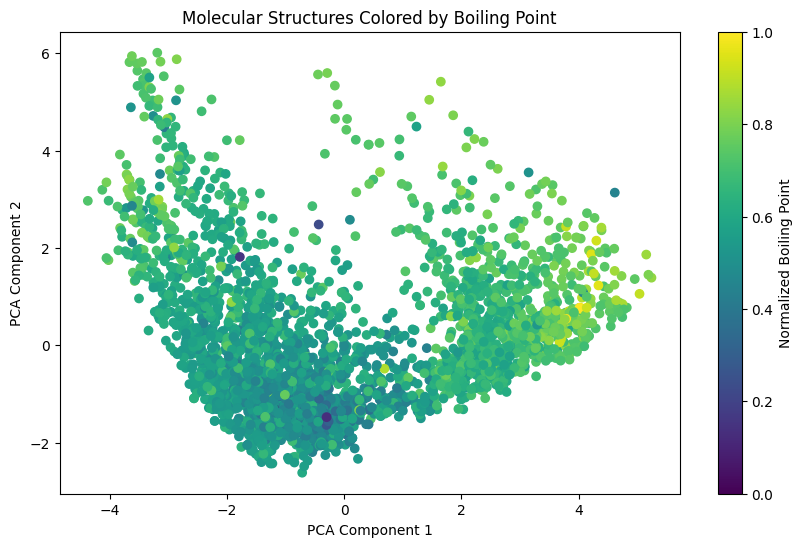

Execution time: 7.99 seconds


In [3]:
import warnings
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# Suppress warnings
warnings.filterwarnings("ignore")

# Function to measure execution time
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time:.2f} seconds")
        return result
    return wrapper

# Generate molecular fingerprints and perform dimensionality reduction
@timeit
def process_data():
    fingerprints = []
    CompoundData['Fingerprint'] = 0
    for i in range(len(CompoundData['SMILES'].dropna())):
        smiles = CompoundData.loc[i, 'SMILES']
        mol = Chem.MolFromSmiles(smiles)
        fp_gen = AllChem.GetAtomPairGenerator()
        fp = fp_gen.GetFingerprint(mol)
        CompoundData.loc[i, 'Fingerprint'] = fp
        fingerprints.append(fp)

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)  # Reduced to 2 components for 2D plotting
    fingerprints_2d = pca.fit_transform(fingerprints)

    # Normalize the boiling point data for better color mapping
    boiling_points = CompoundData['BP']
    norm_bp = (boiling_points - boiling_points.min()) / (boiling_points.max() - boiling_points.min())

    # Visualize the 2D plot with gradient color based on boiling point
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        fingerprints_2d[:, 0], fingerprints_2d[:, 1], 
        c=norm_bp, cmap='viridis'
    )
    plt.colorbar(scatter, label='Normalized Boiling Point')
    plt.title('Molecular Structures Colored by Boiling Point')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Run the process
process_data()


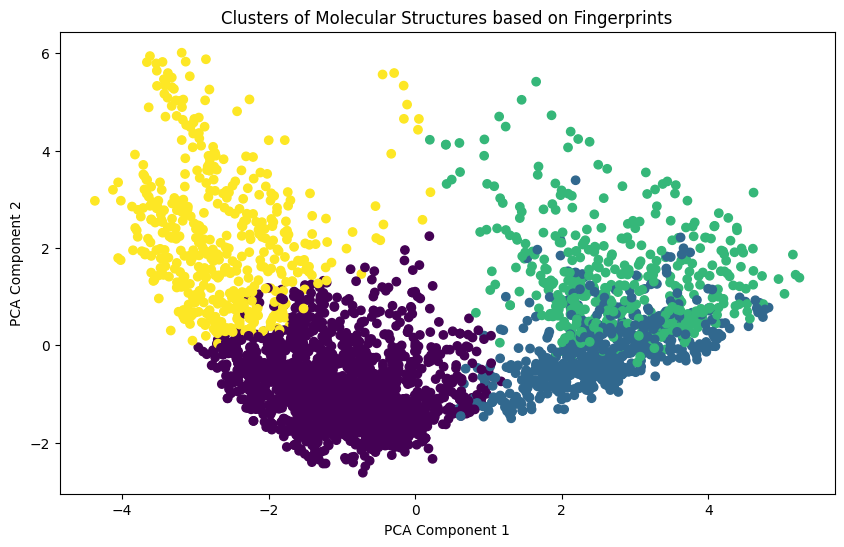

Execution time: 8.70 seconds


In [4]:
import warnings
import time
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem

# Suppress warnings
warnings.filterwarnings("ignore")

# Function to measure execution time
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time:.2f} seconds")
        return result
    return wrapper

# Generate molecular fingerprints and perform dimensionality reduction
@timeit
def process_data():
    fingerprints = []
    CompoundData['Fingerprint'] = 0
    for i in range(len(CompoundData['SMILES'].dropna())):
        smiles = CompoundData.loc[i, 'SMILES']
        mol = Chem.MolFromSmiles(smiles)
        fp_gen = AllChem.GetAtomPairGenerator()
        fp = fp_gen.GetFingerprint(mol)
        CompoundData.loc[i, 'Fingerprint'] = fp
        fingerprints.append(fp)

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=5)
    fingerprints_2d = pca.fit_transform(fingerprints)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=4)
    labels = kmeans.fit_predict(fingerprints_2d)

    # Visualize clusters in 2D
    plt.figure(figsize=(10, 6))
    plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1], c=labels, cmap='viridis')
    plt.title('Clusters of Molecular Structures based on Fingerprints')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Run the process
process_data()


### MNIST KMeans Clustering

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/T-SNE_Embedding_of_MNIST.png/1024px-T-SNE_Embedding_of_MNIST.png">

The MNIST dataset contains images of handwritten digits (0-9). KMeans clustering groups similar digits based on their features into clusters without prior labels. The above visualization uses t-SNE to reduce the high-dimensional feature space into two dimensions for better understanding of the clusters.


# t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique commonly used for visualizing high-dimensional data in 2D or 3D. It emphasizes preserving local structure by modeling pairwise similarities between points using conditional probabilities. 

### Key Features:
- Captures clusters and local patterns effectively.
- Best suited for exploratory data analysis and visualization.
- Computationally intensive, less suitable for very large datasets.

### Limitations:
- Non-deterministic results (varies with random initialization).
- Does not scale well with increasing data size.
- Hyperparameters like perplexity and learning rate require careful tuning.

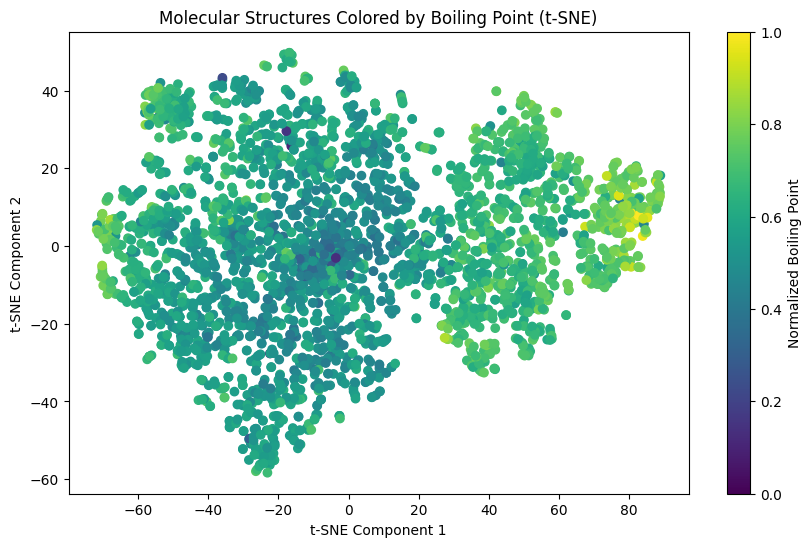

Execution time: 35.46 seconds


In [5]:
import warnings
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np
from rdkit import RDLogger

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')

# Suppress general warnings
warnings.filterwarnings("ignore")

# Function to measure execution time
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time:.2f} seconds")
        return result
    return wrapper

# Generate molecular fingerprints and perform dimensionality reduction
@timeit
def process_data():
    fingerprints = []
    CompoundData['Fingerprint'] = None  # Ensure compatibility for storing fingerprint objects
    for i in range(len(CompoundData['SMILES'].dropna())):
        smiles = CompoundData.loc[i, 'SMILES']
        mol = Chem.MolFromSmiles(smiles)
        if mol:  # Check if the molecule was successfully parsed
            fp_gen = AllChem.GetAtomPairGenerator()
            fp = fp_gen.GetFingerprint(mol)
            CompoundData.loc[i, 'Fingerprint'] = fp
            fingerprints.append(fp)

    # Convert RDKit fingerprints to numpy arrays
    fingerprints_array = []
    for fp in fingerprints:
        arr = np.zeros((1,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fingerprints_array.append(arr)
    fingerprints_array = np.array(fingerprints_array)

    # Perform t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    fingerprints_2d = tsne.fit_transform(fingerprints_array)

    # Normalize the boiling point data for better color mapping
    boiling_points = CompoundData['BP']
    norm_bp = (boiling_points - boiling_points.min()) / (boiling_points.max() - boiling_points.min())

    # Visualize the 2D plot with gradient color based on boiling point
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        fingerprints_2d[:, 0], fingerprints_2d[:, 1], 
        c=norm_bp, cmap='viridis'
    )
    plt.colorbar(scatter, label='Normalized Boiling Point')
    plt.title('Molecular Structures Colored by Boiling Point (t-SNE)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Run the process
process_data()


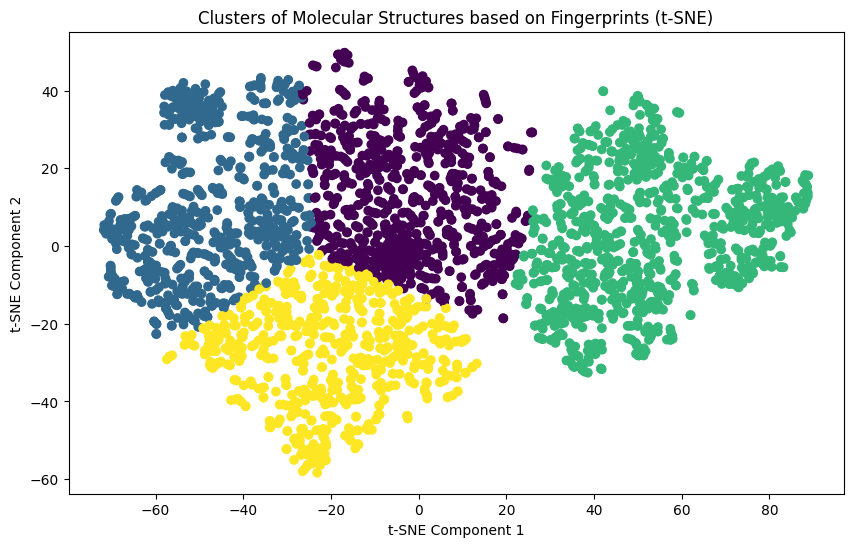

Execution time: 33.19 seconds


In [6]:
import warnings
import time
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np
from rdkit import RDLogger

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')

# Suppress general warnings
warnings.filterwarnings("ignore")

# Function to measure execution time
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time:.2f} seconds")
        return result
    return wrapper

# Generate molecular fingerprints and perform dimensionality reduction
@timeit
def process_data():
    fingerprints = []
    CompoundData['Fingerprint'] = None  # Ensure compatibility for storing fingerprint objects
    for i in range(len(CompoundData['SMILES'].dropna())):
        smiles = CompoundData.loc[i, 'SMILES']
        mol = Chem.MolFromSmiles(smiles)
        if mol:  # Check if the molecule was successfully parsed
            fp_gen = AllChem.GetAtomPairGenerator()
            fp = fp_gen.GetFingerprint(mol)
            CompoundData.loc[i, 'Fingerprint'] = fp
            fingerprints.append(fp)

    # Convert RDKit fingerprints to numpy arrays
    fingerprints_array = []
    for fp in fingerprints:
        arr = np.zeros((1,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fingerprints_array.append(arr)
    fingerprints_array = np.array(fingerprints_array)

    # Perform t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    fingerprints_2d = tsne.fit_transform(fingerprints_array)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=4)
    labels = kmeans.fit_predict(fingerprints_2d)

    # Visualize clusters in 2D
    plt.figure(figsize=(10, 6))
    plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1], c=labels, cmap='viridis')
    plt.title('Clusters of Molecular Structures based on Fingerprints (t-SNE)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Run the process
process_data()


# UMAP

In [4]:
comment this line and exectue to install umap-learn
%pip install umap-learn

SyntaxError: invalid syntax (110700818.py, line 1)

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique used to visualize and analyze high-dimensional data. It is particularly effective at preserving both local and global structures, making it suitable for tasks like clustering and exploratory data analysis.

UMAP is based on mathematical principles from Riemannian geometry and algebraic topology. It models data as a high-dimensional graph and optimizes its low-dimensional representation to preserve relationships between data points.

Key parameters include:
- `n_neighbors`: Determines the balance between local and global structure preservation by controlling the number of neighbors used to construct the graph.
- `min_dist`: Controls how tightly data points are packed together in the low-dimensional space, affecting the visualization's granularity.

UMAP is computationally efficient and scales well with large datasets, making it a versatile tool for a variety of machine-learning and data-analysis applications.


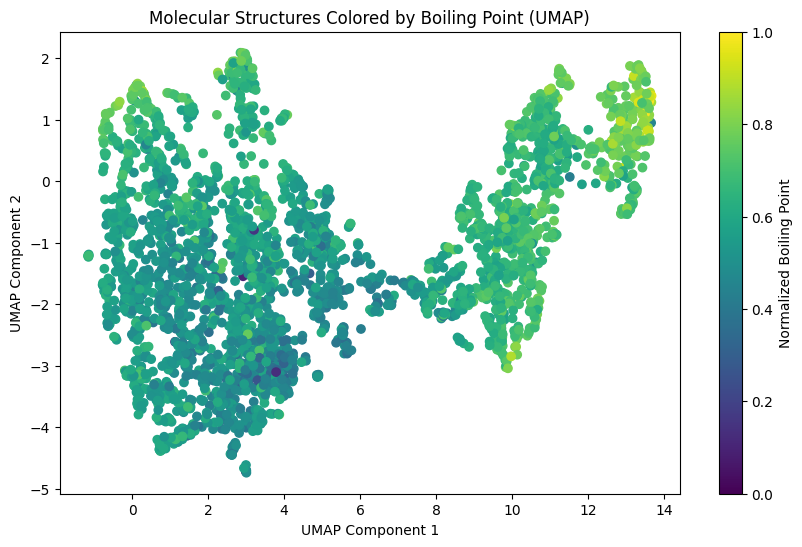

Execution time: 56.26 seconds


In [8]:
import warnings
import time
from umap import UMAP
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np
from rdkit import RDLogger

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')

# Suppress general warnings
warnings.filterwarnings("ignore")

# Function to measure execution time
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time:.2f} seconds")
        return result
    return wrapper

# Main processing function
@timeit
def process_data():
    # Generate molecular fingerprints
    fingerprints = []
    CompoundData['Fingerprint'] = None  # Ensure compatibility for storing fingerprint objects
    for i in range(len(CompoundData['SMILES'].dropna())):
        smiles = CompoundData.loc[i, 'SMILES']
        mol = Chem.MolFromSmiles(smiles)
        if mol:  # Check if the molecule was successfully parsed
            fp_gen = AllChem.GetAtomPairGenerator()
            fp = fp_gen.GetFingerprint(mol)
            CompoundData.loc[i, 'Fingerprint'] = fp
            fingerprints.append(fp)

    # Convert RDKit fingerprints to numpy arrays
    fingerprints_array = []
    for fp in fingerprints:
        arr = np.zeros((1,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fingerprints_array.append(arr)
    fingerprints_array = np.array(fingerprints_array)

    # Perform UMAP for dimensionality reduction
    umap_reducer = UMAP(n_components=2, random_state=42)
    fingerprints_2d = umap_reducer.fit_transform(fingerprints_array)

    # Normalize the boiling point data for better color mapping
    boiling_points = CompoundData['BP']
    norm_bp = (boiling_points - boiling_points.min()) / (boiling_points.max() - boiling_points.min())

    # Visualize the 2D plot with gradient color based on boiling point
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        fingerprints_2d[:, 0], fingerprints_2d[:, 1],
        c=norm_bp, cmap='viridis'
    )
    plt.colorbar(scatter, label='Normalized Boiling Point')
    plt.title('Molecular Structures Colored by Boiling Point (UMAP)')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.show()

# Run the process
process_data()


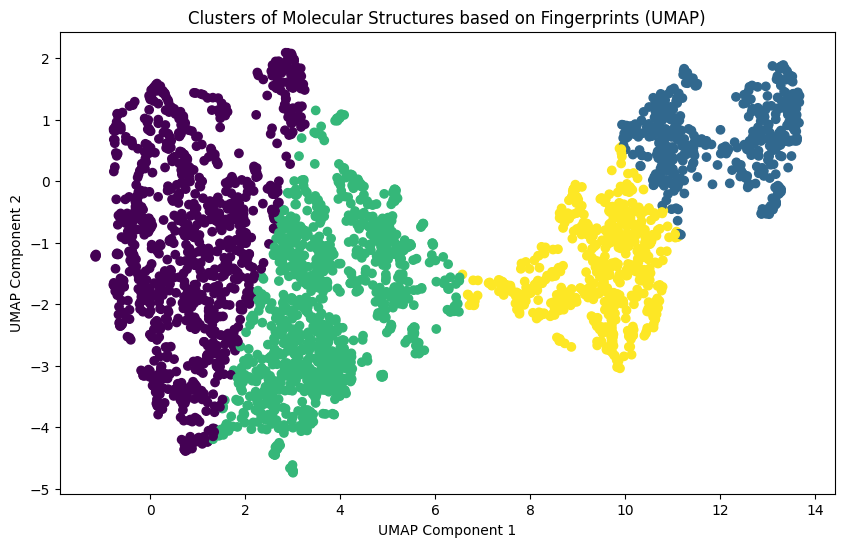

Execution time: 38.52 seconds


In [9]:
import warnings
import time
from umap import UMAP
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np
from rdkit import RDLogger

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')

# Suppress general warnings
warnings.filterwarnings("ignore")

# Function to measure execution time
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time:.2f} seconds")
        return result
    return wrapper

# Main processing function
@timeit
def process_data():
    # Generate molecular fingerprints
    fingerprints = []
    CompoundData['Fingerprint'] = None  # Ensure compatibility for storing fingerprint objects
    for i in range(len(CompoundData['SMILES'].dropna())):
        smiles = CompoundData.loc[i, 'SMILES']
        mol = Chem.MolFromSmiles(smiles)
        if mol:  # Check if the molecule was successfully parsed
            fp_gen = AllChem.GetAtomPairGenerator()
            fp = fp_gen.GetFingerprint(mol)
            CompoundData.loc[i, 'Fingerprint'] = fp
            fingerprints.append(fp)

    # Convert RDKit fingerprints to numpy arrays
    fingerprints_array = []
    for fp in fingerprints:
        arr = np.zeros((1,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fingerprints_array.append(arr)
    fingerprints_array = np.array(fingerprints_array)

    # Perform UMAP for dimensionality reduction
    umap_reducer = UMAP(n_components=2, random_state=42)
    fingerprints_2d = umap_reducer.fit_transform(fingerprints_array)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=4)
    labels = kmeans.fit_predict(fingerprints_2d)

    # Visualize clusters in 2D
    plt.figure(figsize=(10, 6))
    plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1], c=labels, cmap='viridis')
    plt.title('Clusters of Molecular Structures based on Fingerprints (UMAP)')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.show()

# Run the process
process_data()


Epoch [10/100], Loss: 0.0128
Epoch [20/100], Loss: 0.0122
Epoch [30/100], Loss: 0.0119
Epoch [40/100], Loss: 0.0112
Epoch [50/100], Loss: 0.0110
Epoch [60/100], Loss: 0.0107
Epoch [70/100], Loss: 0.0105
Epoch [80/100], Loss: 0.0101
Epoch [90/100], Loss: 0.0102
Epoch [100/100], Loss: 0.0099


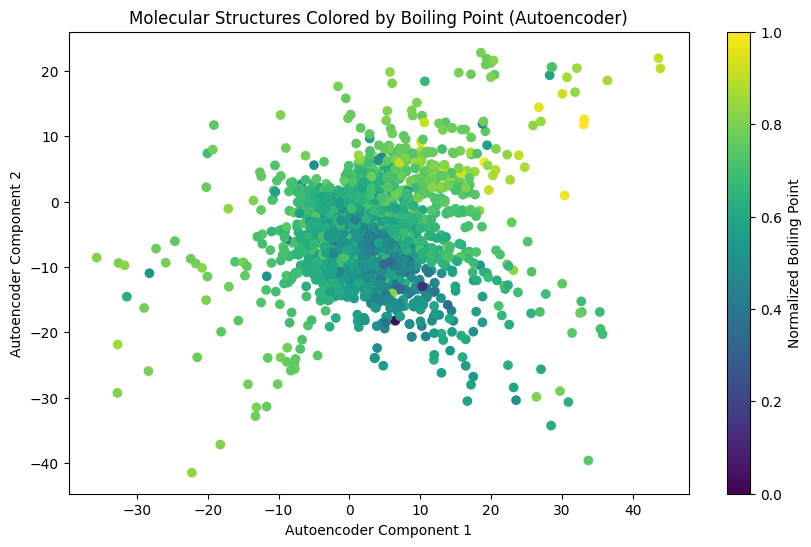

Execution time: 328.67 seconds


In [10]:
import warnings
import time
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np
from rdkit import RDLogger

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')

# Suppress general warnings
warnings.filterwarnings("ignore")

# Function to measure execution time
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time:.2f} seconds")
        return result
    return wrapper

# Autoencoder definition
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # 2-dimensional latent space for visualization
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  # Use Sigmoid if input data is normalized (0-1), else use appropriate activation
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Generate molecular fingerprints and perform dimensionality reduction using autoencoder
@timeit
def process_data():
    fingerprints = []
    CompoundData['Fingerprint'] = None  # Ensure compatibility for storing fingerprint objects
    for i in range(len(CompoundData['SMILES'].dropna())):
        smiles = CompoundData.loc[i, 'SMILES']
        mol = Chem.MolFromSmiles(smiles)
        if mol:  # Check if the molecule was successfully parsed
            fp_gen = AllChem.GetAtomPairGenerator()
            fp = fp_gen.GetFingerprint(mol)
            CompoundData.loc[i, 'Fingerprint'] = fp
            fingerprints.append(fp)

    # Convert RDKit fingerprints to numpy arrays
    fingerprints_array = []
    for fp in fingerprints:
        arr = np.zeros((1,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fingerprints_array.append(arr)
    fingerprints_array = np.array(fingerprints_array)

    # Normalize the data
    fingerprints_array = fingerprints_array.astype(np.float32) / np.max(fingerprints_array)

    # Convert data to PyTorch tensors
    fingerprints_tensor = torch.tensor(fingerprints_array, dtype=torch.float32)

    # Define and train the autoencoder
    input_dim = fingerprints_tensor.shape[1]
    autoencoder = Autoencoder(input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
    num_epochs = 100
    batch_size = 32

    for epoch in range(num_epochs):
        autoencoder.train()
        for i in range(0, len(fingerprints_tensor), batch_size):
            batch = fingerprints_tensor[i:i+batch_size]
            optimizer.zero_grad()
            encoded, decoded = autoencoder(batch)
            loss = criterion(decoded, batch)
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

    # Use the trained encoder for dimensionality reduction
    autoencoder.eval()
    with torch.no_grad():
        encoded_data, _ = autoencoder(fingerprints_tensor)
    fingerprints_2d = encoded_data.numpy()

    # Normalize the boiling point data for better color mapping
    boiling_points = CompoundData['BP']
    norm_bp = (boiling_points - boiling_points.min()) / (boiling_points.max() - boiling_points.min())

    # Visualize the 2D plot with gradient color based on boiling point
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        fingerprints_2d[:, 0], fingerprints_2d[:, 1],
        c=norm_bp, cmap='viridis'
    )
    plt.colorbar(scatter, label='Normalized Boiling Point')
    plt.title('Molecular Structures Colored by Boiling Point (Autoencoder)')
    plt.xlabel('Autoencoder Component 1')
    plt.ylabel('Autoencoder Component 2')
    plt.show()

# Run the process
process_data()


Epoch [10/100], Loss: 0.0126
Epoch [20/100], Loss: 0.0119
Epoch [30/100], Loss: 0.0113
Epoch [40/100], Loss: 0.0110
Epoch [50/100], Loss: 0.0106
Epoch [60/100], Loss: 0.0106
Epoch [70/100], Loss: 0.0102
Epoch [80/100], Loss: 0.0101
Epoch [90/100], Loss: 0.0100
Epoch [100/100], Loss: 0.0097


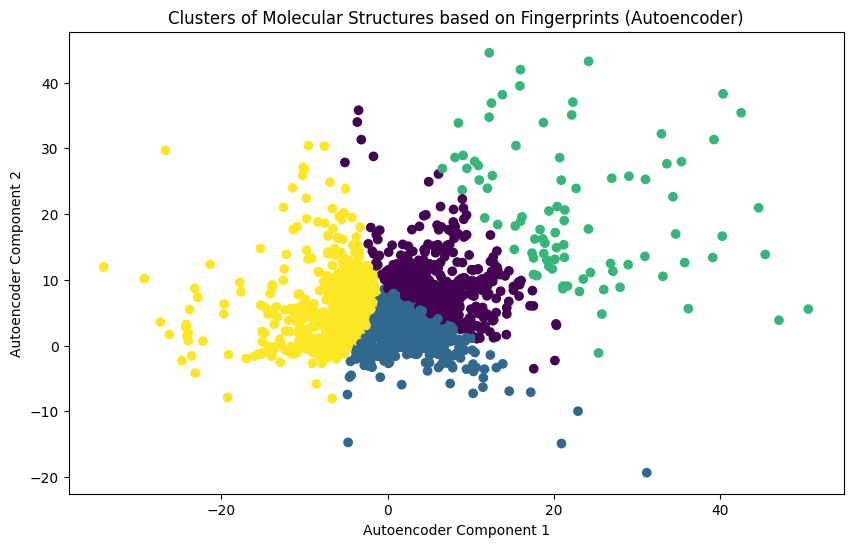

Execution time: 295.28 seconds


In [11]:
import warnings
import time
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np
from rdkit import RDLogger

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')

# Suppress general warnings
warnings.filterwarnings("ignore")

# Function to measure execution time
def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time:.2f} seconds")
        return result
    return wrapper

# Autoencoder definition
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # 2-dimensional latent space for visualization
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  # Use Sigmoid if input data is normalized (0-1), else use appropriate activation
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Generate molecular fingerprints and perform dimensionality reduction using autoencoder
@timeit
def process_data():
    fingerprints = []
    CompoundData['Fingerprint'] = None  # Ensure compatibility for storing fingerprint objects
    for i in range(len(CompoundData['SMILES'].dropna())):
        smiles = CompoundData.loc[i, 'SMILES']
        mol = Chem.MolFromSmiles(smiles)
        if mol:  # Check if the molecule was successfully parsed
            fp_gen = AllChem.GetAtomPairGenerator()
            fp = fp_gen.GetFingerprint(mol)
            CompoundData.loc[i, 'Fingerprint'] = fp
            fingerprints.append(fp)

    # Convert RDKit fingerprints to numpy arrays
    fingerprints_array = []
    for fp in fingerprints:
        arr = np.zeros((1,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fingerprints_array.append(arr)
    fingerprints_array = np.array(fingerprints_array)

    # Normalize the data
    fingerprints_array = fingerprints_array.astype(np.float32) / np.max(fingerprints_array)

    # Convert data to PyTorch tensors
    fingerprints_tensor = torch.tensor(fingerprints_array, dtype=torch.float32)

    # Define and train the autoencoder
    input_dim = fingerprints_tensor.shape[1]
    autoencoder = Autoencoder(input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
    num_epochs = 100
    batch_size = 32

    for epoch in range(num_epochs):
        autoencoder.train()
        for i in range(0, len(fingerprints_tensor), batch_size):
            batch = fingerprints_tensor[i:i+batch_size]
            optimizer.zero_grad()
            encoded, decoded = autoencoder(batch)
            loss = criterion(decoded, batch)
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

    # Use the trained encoder for dimensionality reduction
    autoencoder.eval()
    with torch.no_grad():
        encoded_data, _ = autoencoder(fingerprints_tensor)
    fingerprints_2d = encoded_data.numpy()

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=4)
    labels = kmeans.fit_predict(fingerprints_2d)

    # Visualize clusters in 2D
    plt.figure(figsize=(10, 6))
    plt.scatter(fingerprints_2d[:, 0], fingerprints_2d[:, 1], c=labels, cmap='viridis')
    plt.title('Clusters of Molecular Structures based on Fingerprints (Autoencoder)')
    plt.xlabel('Autoencoder Component 1')
    plt.ylabel('Autoencoder Component 2')
    plt.show()

# Run the process
process_data()


# Practice: Use ChatGPT as Your Coteacher

## Task
- Load `CompoundDataFuncsFingerprints.parquet`.
- Identify three additional features that you expect to correlate with boiling point (these can be scalars or vectors).
- Calculate these features for each compound and add new columns to the DataFrame.
- Show a screenshot of the dataframe with columns added
- Plot the features vs. boiling point and discuss - be creative with your plots to try to gain insights into the data
- --How do you plot a chemical fingerprint?

## Options

### Expand on Existing Features:
- Number of each functional group (not just 0 or 1)
- Statistical distribution of Crippen charge

### Include Chemical Descriptors from RDKit:
- Asphericity
- Radius of gyration
- Spherocity Index
- WHIM
- RDF
- Lipinski descriptors
- Number of rotatable bonds
- Distribution of oxidation numbers

### Additional Chemical Fingerprints:
- Morgan
- Topological Torsion
- Pattern
- Layered
